# Dimuon analysis

In [1]:
import uproot
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from iminuit import Minuit
from iminuit.cost import LeastSquares
import importlib
import utils

In [2]:
inputFile = uproot.open('OpenData/2lep/Data/data_A.2lep.root')
events = inputFile['mini']

In [3]:
lep_df = events.arrays(['lep_pt','lep_eta', 'lep_phi', 'lep_charge', 'lep_type', 'lep_isTightID'], outputtype=pd.DataFrame)

In [4]:
importlib.reload(utils)
lep_df['dimuon_mass']= lep_df.apply(utils.dimuon_mass,axis=1)

In [5]:
masses = lep_df['dimuon_mass'].to_numpy()

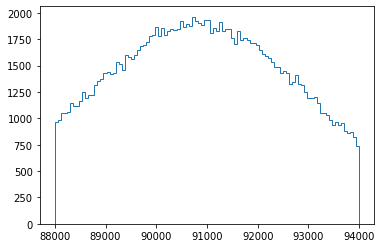

In [6]:
fig, ax = plt.subplots()
#ax.set_xscale('log')
histogram = ax.hist(np.concatenate(masses.ravel()), range=[88000,94000], bins=100, histtype='step')
#ax.set_xscale('log')

In [7]:
importlib.reload(utils)
least_squares = LeastSquares([(histogram[1][i] + histogram[1][i+1])/2. for i in range(len(histogram[1])-1)], histogram[0], np.sqrt(histogram[0]), utils.voigtian_bkg)

In [8]:
m = Minuit(least_squares, A=0.5e8, m0=91187.6, sigma=2000, p0=100, p1=10,limit_m0=(90000,92000),limit_sigma=(0,6000),limit_p0=(0,None))

In [9]:
m.migrad()

------------------------------------------------------------------
| FCN = 6514                    |     Ncalls=327 (327 total)     |
| EDM = 0.000157 (Goal: 0.0002) |            up = 1.0            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
-------------------------------------------------------------------------------------------
|   | Name  |   Value   | Hesse Err | Minos Err- | Minos Err+ | Limit-  | Limit+  | Fixed |
-------------------------------------------------------------------------------------------
| 0 | A     |  29.03e6  |  0.24e6   |            |            |         |         |       |
| 1 | m0    |90.00000e3 | 0.00021e3 |            |            |  90000  |  92000  |       |
| 2 | sigma | 6.0000e3  | 0.0005e3  |            |            |    0    |  6000   |       |
| 3 | p0    |   0.00    |   0.05    |            |            |    0    |         |       |
| 4 | p1    |    8.3    |    2.2    |            |            |         |         |       |
-------------------------------------------------------------------------------------------

In [10]:
m.hesse()

-------------------------------------------------------------------------------------------
|   | Name  |   Value   | Hesse Err | Minos Err- | Minos Err+ | Limit-  | Limit+  | Fixed |
-------------------------------------------------------------------------------------------
| 0 | A     |29.03444493e6|0.00000004e6|            |            |         |         |       |
| 1 | m0    | 90.0000e3 | 0.0007e3  |            |            |  90000  |  92000  |       |
| 2 | sigma |    6e3    |    5e3    |            |            |    0    |  6000   |       |
| 3 | p0    |     0     |  0.7e-3   |            |            |    0    |         |       |
| 4 | p1    |   8.26    |   0.04    |            |            |         |         |       |
-------------------------------------------------------------------------------------------

<ValueView of Minuit at fedfc18>
  A: 29034444.931875914
  m0: 90000.00034079711
  sigma: 5999.998640681535
  p0: 3.965952450402099e-05
  p1: 8.264051578955161


(array([ 966.,  984., 1046., 1052., 1059., 1141., 1113., 1114., 1164.,
        1252., 1193., 1223., 1219., 1314., 1352., 1370., 1427., 1439.,
        1417., 1432., 1529., 1519., 1455., 1597., 1583., 1566., 1597.,
        1645., 1682., 1698., 1727., 1779., 1794., 1863., 1779., 1855.,
        1793., 1827., 1842., 1840., 1842., 1920., 1869., 1891., 1877.,
        1963., 1924., 1907., 1883., 1936., 1935., 1813., 1856., 1823.,
        1909., 1823., 1842., 1844., 1763., 1700., 1827., 1741., 1757.,
        1738., 1714., 1713., 1698., 1648., 1608., 1595., 1570., 1536.,
        1487., 1488., 1430., 1449., 1425., 1327., 1344., 1410., 1322.,
        1311., 1254., 1193., 1195., 1202., 1148., 1054., 1053., 1029.,
         984.,  935.,  966.,  939.,  959.,  882.,  862.,  872.,  821.,
         736.]),
 array([88000., 88060., 88120., 88180., 88240., 88300., 88360., 88420.,
        88480., 88540., 88600., 88660., 88720., 88780., 88840., 88900.,
        88960., 89020., 89080., 89140., 89200., 89260., 89

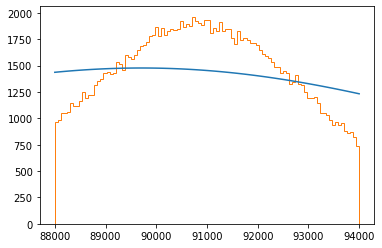

In [11]:
fig2, ax2 = plt.subplots()
print(m.values)
ax2.plot(np.linspace(88000,94000,100),utils.voigtian_bkg(np.linspace(88000,94000,100),*m.values.values()))
ax2.hist(np.concatenate(masses.ravel()), range=[88000,94000], bins=100, histtype='step')

In [12]:
sum(histogram[0])

147789.0